# CIFAR- 10 image Classification Project

# Convolutional Neural Network:
Convolutional Neural Networks or CNNs are a type of Deep Learning method usually used for image classification and feature extraction.
It consist of several layers namely:
* Convolutional layer
* Pooling layer
* Fully connected layer

### About the dataset
This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

Label	Description

0	airplane

1	automobile

2	bird

3	cat

4	deer

5	dog

6	frog

7	horse

8	ship

9	truck



### Importing the necessary libraries

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## **Importing the dataset**


In [21]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

## EDA (Exploratory Data Analysis)

Checking the number of rows (records) and columns (features)

In [22]:
x_train.shape

(50000, 32, 32, 3)

In [23]:
x_train[0].shape

(32, 32, 3)

Visualizing some of the images from the training dataset

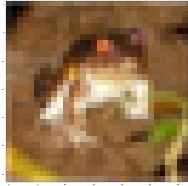

In [24]:
# FROG
plt.figure(figsize = (15,15),dpi = 16 )
plt.imshow(x_train[0])

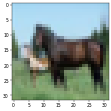

In [25]:
#Horse
plt.figure(figsize = (6,4),dpi = 32 )
plt.imshow(x_train[12])

# **Data PreProcessing**

In [26]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [27]:
x_train[0].shape

(32, 32, 3)

In [28]:
x_train.max()

255

#### Normalization
The reason for Standardizing/Normalizing is to convert all pixel values to values between 0 and 1.

In [29]:
#normalization
x_train = x_train/255

In [30]:
x_test = x_test/255

In [31]:
x_train.shape

(50000, 32, 32, 3)

In [32]:
x_test.shape

(10000, 32, 32, 3)

# **Label**

In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
y_train.shape

(50000, 1)

In [35]:
y_train[0]

array([6], dtype=uint8)

In [36]:
y_cat_train = to_categorical(y_train, 10)

In [37]:
y_cat_train.shape

(50000, 10)

In [38]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [39]:
y_cat_test = to_categorical(y_test, 10)

In [40]:
y_cat_test.shape

(10000, 10)

In [41]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In the above cells, we converted the categorical values into float.

* The reason for converting type to float is that to_categorical (one hot encoding) needs the data to be of type float by default.
* The reason for using to_categorical is that the loss function that we will be using in this code (categorical_crossentropy) when compiling the model needs data to be one hot encoded.

## Building the CNN Model using *Keras*

In [84]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [85]:
# Creating a sequential model and adding layers to it
model = Sequential()

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

Here we created a model and using the `add` method we add the layers.

In CNN we use two sets of layers. Each set consist of convolutional layer and pooling layer.

**Convolutional layer**

Each convolutional neural network consists of one or more convolutional layers. These layers are the main building component of CNNs and are tasked with finding patterns in the images that can be used for image classification. While dense layers are used to find features globally on the image, Convolutional layers detect patterns locally. When we have a densely connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at all the information and is only capable of analyzing the data in a global capacity. Convolutional layers use filters to achieve this local pattern detection. Each Convolutional layer consists of several filters with the same size, each looking for different information inside the image. A filter is a m x n pattern of pixels that we are looking for in an image. The output of the Convolutional layer will have a depth equal to the number of filters used in that layer.



In [86]:
# FIRST SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))


**Pooling layer**

 Pooling layers are used to downsample the output of the convolutional layers and reduce its dimensions. There are 3 types of pooling: Max Pooling, Min Pooling, Average Pooling. Pooling is usually done using a 2x2 window with a stride of 2, which reduces the size of the output by 2x.

In [87]:
# POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2), strides=2))

Second set of layers


In [88]:
## SECOND SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3),
                 input_shape = (32,32,3), activation = 'relu'))

In [89]:
#Pooling layer
model.add(MaxPool2D(pool_size = (2,2), strides=2))

In [90]:
#third set of layers
model.add(Conv2D(filters = 128, kernel_size = (4,4),
                 input_shape = (32,32,3), activation = 'relu'))
#Pooling layer
model.add(MaxPool2D(pool_size = (2,2), strides=2))

**Flattening**

After finishing the previous two steps, we're supposed to have a pooled feature map by now. As the name of this step implies, we are literally going to flatten our pooled feature map into a column. The reason we do this is that we're going to need to insert this data into an artificial neural network later on.

In [91]:
# Flatten  images from 28 by 28  to 764 BEFORE FINAL LAYER
model.add(Flatten())

**Dense layer**

Dense layers are fully connected layers in neural networks. Each neuron in the dense layer receives information from all neurons in the previous layer. Dense layers are the most commonly used layers in neural networks. The output of a dense layer with M neurons is an M dimensional vector. This type of layer is usually used at the end of the neural network to determine which class the image belongs to.

In [92]:
# 256 Neurons in dense hidden layer ()
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))

**Fully connected layer**

Here's where artificial neural networks and convolutional neural networks collide as we add the former to our latter. It's here that the process of creating a convolutional neural network begins to take a more complex and sophisticated turn.

In [93]:
# last layer is the classifier, THUS 10 possible classes
model.add(Dense(10, activation = 'softmax'))

In [94]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [95]:
# Checking the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         131200    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 128)       

**Early stopping**
* Keras early stopping overviews involve certain features where the keras early class comprise of certain parameters which helps in stopping the continuous training as soon as any of the metrics as part of monitoring gets stopped especially on aspects of improvement.
* The main motto of training and bringing early stopping class in keras is its beauty of balancing and minimizing the loss.
* Early stopping somehow depends on the callback function with performance measurement and monitoring features.
* Early stopping callback function with all performance metrics get some of the minimum and maximum values for reconsideration depending upon the requirement.

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

In [97]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

Train the model
Train the model by calling the fit method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables(called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the fit method. The first arfument is the imputs, the second argument is the desired outputs. The epochs argument specifies how manu times this cycle should be run, and the verbose argument controls how much output the method produces.# 

In [98]:
model.fit(x_train, y_cat_train, epochs = 30, 
          validation_data = (x_test,y_cat_test), 
          callbacks = [early_stop])

Epoch 1/30
1563/1563 [==============================] - 96s 59ms/step - loss: 1.5888 - accuracy: 0.4237 - val_loss: 1.3504 - val_accuracy: 0.5174
Epoch 2/30
1563/1563 [==============================] - 79s 51ms/step - loss: 1.2043 - accuracy: 0.5802 - val_loss: 1.1350 - val_accuracy: 0.6033
Epoch 3/30
1563/1563 [==============================] - 87s 56ms/step - loss: 1.0492 - accuracy: 0.6367 - val_loss: 1.1099 - val_accuracy: 0.6259
Epoch 4/30
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9450 - accuracy: 0.6751 - val_loss: 1.0313 - val_accuracy: 0.6482
Epoch 5/30
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8807 - accuracy: 0.7005 - val_loss: 1.0505 - val_accuracy: 0.6448
Epoch 6/30
1563/1563 [==============================] - 89s 57ms/step - loss: 0.8488 - accuracy: 0.7125 - val_loss: 1.0422 - val_accuracy: 0.6558
Epoch 7/30
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8336 - accuracy: 0.7208 - val_loss: 1.0587 -

This means a model can resume where it left off and avoid long training times.

In [99]:
losses = pd.DataFrame(model.history.history)

In [100]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.588813,0.42374,1.350445,0.5174
1,1.204347,0.58022,1.135003,0.6033
2,1.049190,0.63668,1.109906,0.6259
3,0.944993,0.67506,1.031289,0.6482
4,0.880664,0.70048,1.050510,0.6448


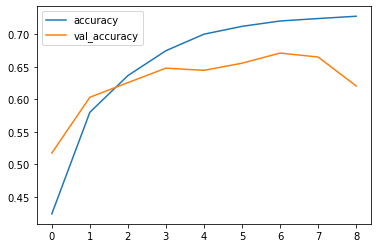

In [101]:
losses[['accuracy','val_accuracy']].plot();

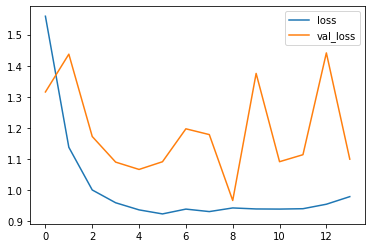

In [70]:
losses[['loss','val_loss']].plot();

In [71]:
model.metrics_names

['loss', 'accuracy']

In [72]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose = 0))

['loss', 'accuracy']
[1.09999418258667, 0.6740000247955322]


In [73]:
print(x_test)

[[[[0.61960784 0.43921569 0.19215686]
   [0.62352941 0.43529412 0.18431373]
   [0.64705882 0.45490196 0.2       ]
   ...
   [0.5372549  0.37254902 0.14117647]
   [0.49411765 0.35686275 0.14117647]
   [0.45490196 0.33333333 0.12941176]]

  [[0.59607843 0.43921569 0.2       ]
   [0.59215686 0.43137255 0.15686275]
   [0.62352941 0.44705882 0.17647059]
   ...
   [0.53333333 0.37254902 0.12156863]
   [0.49019608 0.35686275 0.1254902 ]
   [0.46666667 0.34509804 0.13333333]]

  [[0.59215686 0.43137255 0.18431373]
   [0.59215686 0.42745098 0.12941176]
   [0.61960784 0.43529412 0.14117647]
   ...
   [0.54509804 0.38431373 0.13333333]
   [0.50980392 0.37254902 0.13333333]
   [0.47058824 0.34901961 0.12941176]]

  ...

  [[0.26666667 0.48627451 0.69411765]
   [0.16470588 0.39215686 0.58039216]
   [0.12156863 0.34509804 0.5372549 ]
   ...
   [0.14901961 0.38039216 0.57254902]
   [0.05098039 0.25098039 0.42352941]
   [0.15686275 0.33333333 0.49803922]]

  [[0.23921569 0.45490196 0.65882353]
   [0.1

In [74]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x = model.predict(x_test)
predict_classes = np.argmax(predict_x,axis=1)


313/313 [==============================] - 6s 15ms/step


In [75]:
print(classification_report(y_test,predict_classes))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69      1000
           1       0.87      0.79      0.83      1000
           2       0.42      0.71      0.53      1000
           3       0.61      0.39      0.48      1000
           4       0.63      0.63      0.63      1000
           5       0.61      0.59      0.60      1000
           6       0.76      0.74      0.75      1000
           7       0.78      0.66      0.72      1000
           8       0.71      0.88      0.78      1000
           9       0.79      0.72      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.70      0.67      0.68     10000
weighted avg       0.70      0.67      0.68     10000



In [76]:
confusion_matrix(y_test,predict_classes)

array([[621,   8,  89,  13,  26,   8,  11,   6, 179,  39],
       [ 14, 791,  20,   5,   2,   5,  20,   6,  32, 105],
       [ 47,   1, 711,  31,  62,  62,  38,  20,  21,   7],
       [ 20,   4, 198, 393,  56, 167,  75,  44,  30,  13],
       [ 12,   2, 208,  26, 628,  39,  24,  40,  17,   4],
       [  6,   2, 171,  97,  49, 591,  25,  39,  17,   3],
       [  2,   4, 134,  33,  47,  22, 744,   5,   6,   3],
       [ 10,   3, 114,  29,  97,  65,   3, 663,   8,   8],
       [ 42,  21,  19,   8,   9,   6,   3,   1, 878,  13],
       [ 31,  75,  35,  13,  13,   5,  31,  21,  56, 720]], dtype=int64)

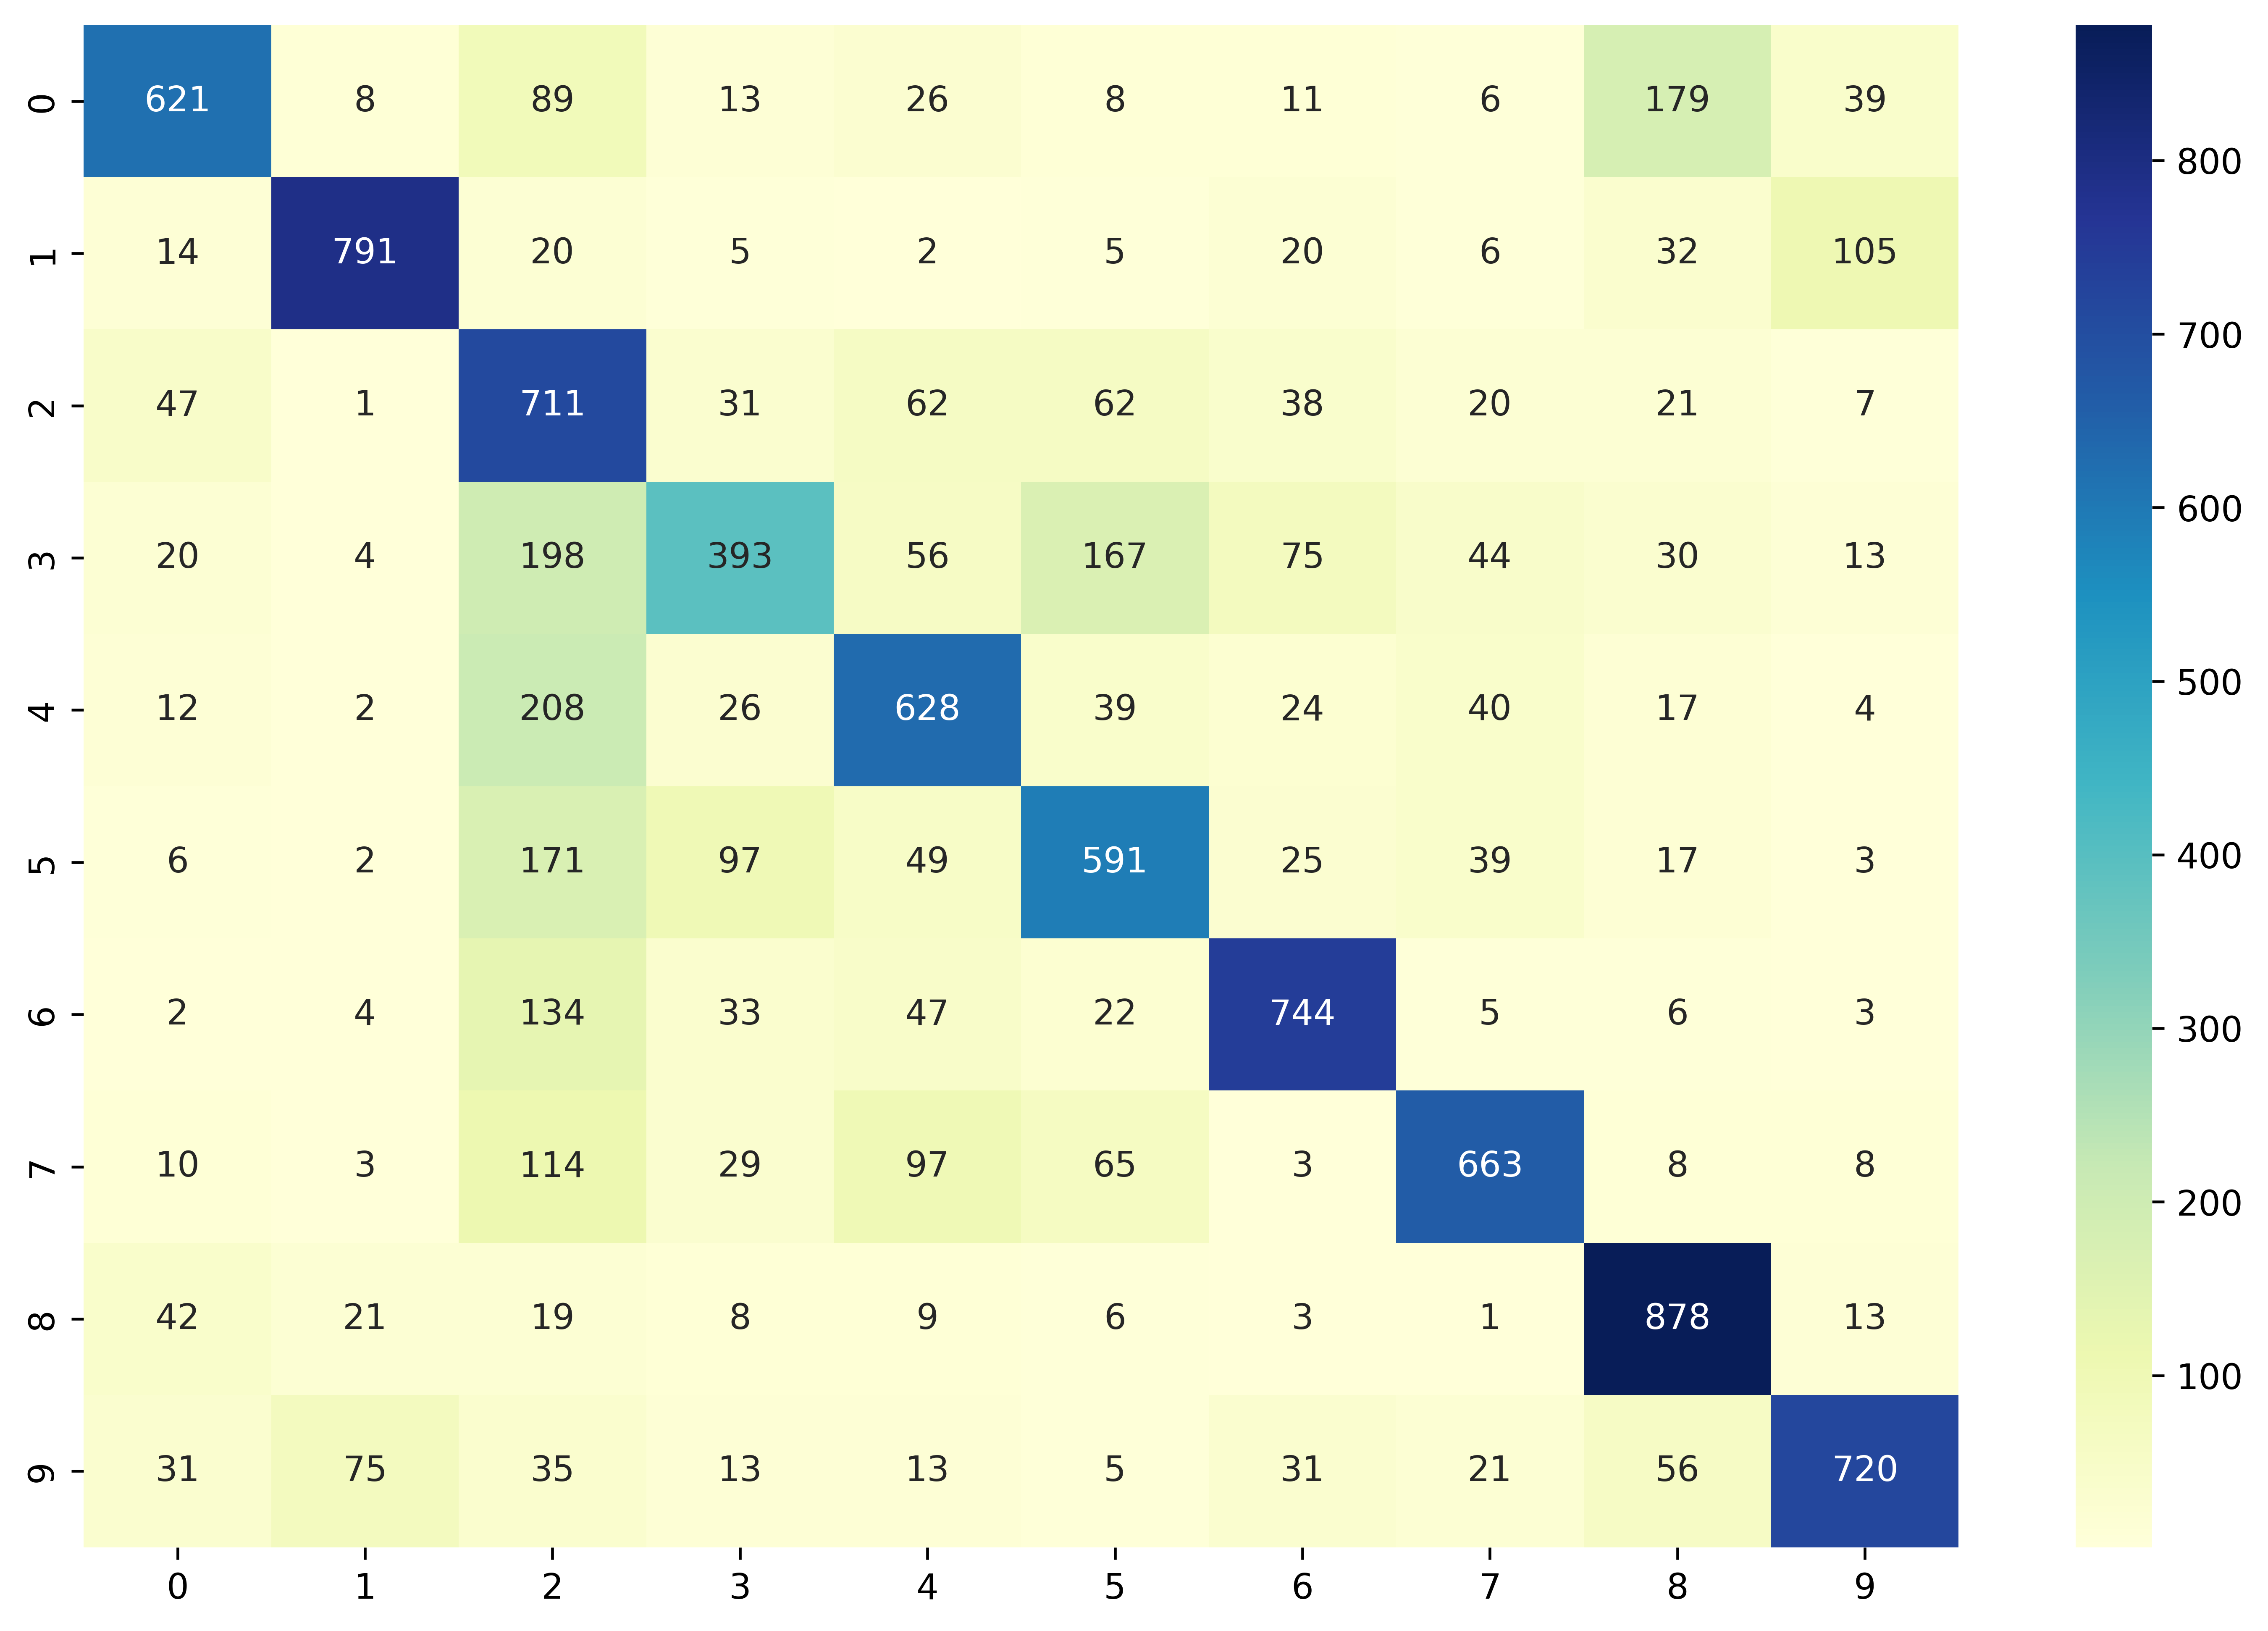

In [77]:
import seaborn as sns
plt.figure(figsize=(12,8), dpi = 600)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="YlGnBu", annot=True, fmt='g');

Predicting a given image

In [78]:
my_image = x_test[10]

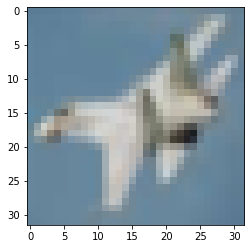

In [79]:
plt.imshow(my_image)

In [80]:
my_image = x_test[17]

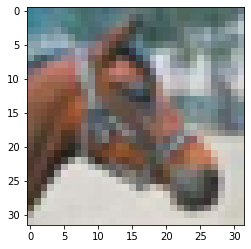

In [81]:
plt.imshow(my_image)

In [83]:
 np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 46ms/step


array([[0.009468, 0.000046, 0.180221, 0.149330, 0.083890, 0.168983,
        0.012400, 0.394693, 0.000425, 0.000544]], dtype=float32)

yes! it correctly predicted that it is a horse!
Hence, we completed the pediction.